# Term Frequency Approach for Latest News: Eat and Drink Articles

Hypothesis: From unstructured text in the Latest Eat & Drink articles, we'll be able to use term requencies to identify:
1) Restaurants 
2) Their Locations
3) General senitment terms (New, opening, hype, dank, excited, Instagram, popular, etc...) 
to estimate correlationships between increased visitation of a featured establishment and a recently published BlogTO article.

PRESTO can then use highly correlated BlogTO-Establishment pairs to inform their establishment engagement strategy.


# Article 1 Test: Gusto 101
https://www.blogto.com/eat_drink/2019/09/gusto-501-italian-toronto/

In [17]:
article1 = open("Article1.txt", "r")

#Read doc, print contents
article1Txt = article1.read()
print(article1Txt)

One of Toronto's favourite Italian restaurants is opening a new multi-level location

The people behind Gusto 101, known for serving some of the best Italian food in the city, will soon be opening an innovative five-level location.

Dubbed Gusto 501 and located at 501 King East, the five levels will comprise an open-concept ground floor dining room, semi-private amari lounge, cocktail bar, a chef tasting kitchen called "Attico" on the top floor and a seasonal rooftop patio. Expect favourites from the Gusto 101 menu, as well as new spins on contemporary Italian.

"When we purchased the property almost five years ago, I had this gut feeling. There was something special about this neighbourhood that felt exciting, undiscovered. I took a chance on Corktown, believing it would be the ideal home for our next big project," said Janet Zuccarini, CEO and Owner of Gusto 54 Restaurant Group.

Formerly home to an auto body shop, the towering new space will come with custom terracotta brick walls a

In [18]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article1Txt= ''.join(c for c in article1Txt if c not in punctuation).lower()

#Print normalized text
print(article1Txt)

one of torontos favourite italian restaurants is opening a new multilevel location

the people behind gusto 101 known for serving some of the best italian food in the city will soon be opening an innovative fivelevel location

dubbed gusto 501 and located at 501 king east the five levels will comprise an openconcept ground floor dining room semiprivate amari lounge cocktail bar a chef tasting kitchen called attico on the top floor and a seasonal rooftop patio expect favourites from the gusto 101 menu as well as new spins on contemporary italian

when we purchased the property almost five years ago i had this gut feeling there was something special about this neighbourhood that felt exciting undiscovered i took a chance on corktown believing it would be the ideal home for our next big project said janet zuccarini ceo and owner of gusto 54 restaurant group

formerly home to an auto body shop the towering new space will come with custom terracotta brick walls and an allglass facade that w

In [19]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article1Txt)


[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)


              Count
one               1
of                4
torontos          1
favourite         1
italian           3
restaurants       1
is                2
opening           2
a                 4
new               3
multilevel        1
location          2
the              12
people            1
behind            1
gusto             5
101               2
known             1
for               3
serving           1
some              1
best              1
food              2
in                2
city              1
will              4
soon              1
be                2
an                4
innovative        1
...             ...
allglass          1
facade            1
create            1
illusion          1
floating          1
designed          1
by                3
architecture      1
interiors         1
are               1
partisans         1
responsible       1
raval             1
union             1
station           1
court             1
interior          1
decor             1


In [21]:
#Remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
article1Txt = ' '.join([word for word in article1Txt.split() if word not in (stopwords.words('english'))])
print(article1Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
one torontos favourite italian restaurants opening new multilevel location people behind gusto 101 known serving best italian food city soon opening innovative fivelevel location dubbed gusto 501 located 501 king east five levels comprise openconcept ground floor dining room semiprivate amari lounge cocktail bar chef tasting kitchen called attico top floor seasonal rooftop patio expect favourites gusto 101 menu well new spins contemporary italian purchased property almost five years ago gut feeling something special neighbourhood felt exciting undiscovered took chance corktown believing would ideal home next big project said janet zuccarini ceo owner gusto 54 restaurant group formerly home auto body shop towering new space come custom terracotta brick walls allglass facade create illusion floating levels designed architecture interiors partisans responsible bar 

In [22]:
#Apply porter stemmer to remaining words
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

#F.Dist of stems
fdist = FreqDist(words)
counf_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

In [23]:
# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(article1Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


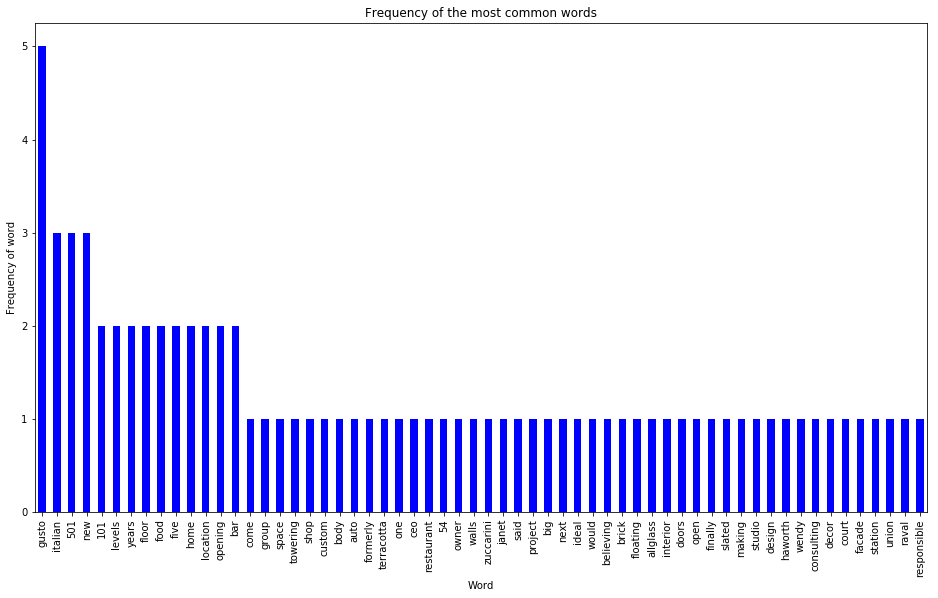

In [24]:
# Plot the frequency of the top 60 words
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [25]:
#Apply porter stemmer to remaining words
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

#F.Dist of stems
fdist = FreqDist(stems)
counf_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

In [26]:
# Get the frequency distribution of the stems
words = nltk.tokenize.word_tokenize(article1Txt)
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


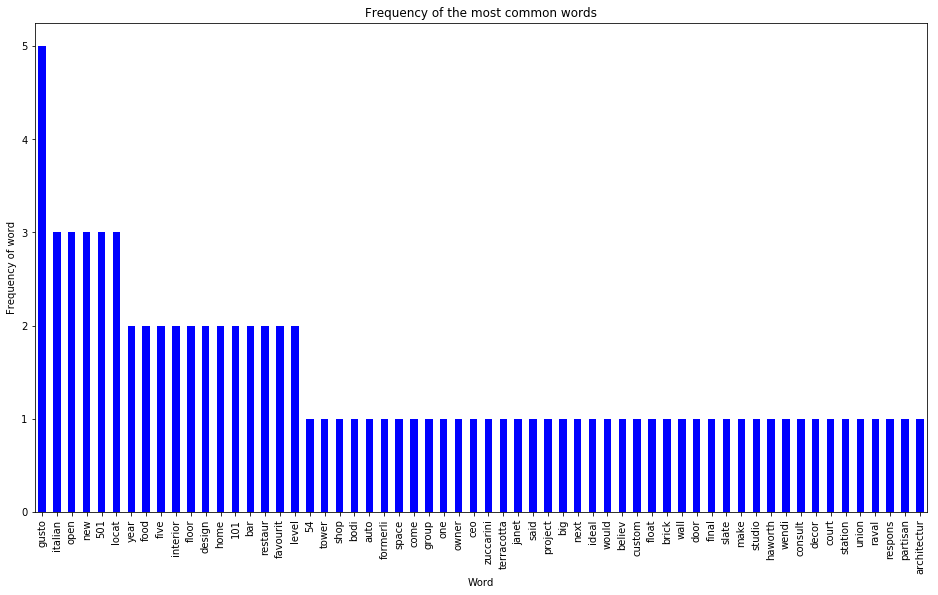

In [27]:
# Plot the frequency of the top 60 stems
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common stems')
ax.set_ylabel('Frequency of stem')
ax.set_xlabel('Stem')
plt.show()

# Article 2 Test: Machi Machi
https://www.blogto.com/eat_drink/2019/09/cheese-tea-machi-machi-toronto/

In [28]:
article2 = open("article2.txt", "r")

#Read doc, print contents
article2Txt = article2.read()
print(article2Txt)

Popular cheese tea chain Machi Machi just opened its first Toronto location

If you love cheese foam on your bubble tea, good news: Toronto now has a location of the world-famous boba spot, Machi Machi. 

The Taiwanese bubble tea chain has just opened a new store at 575 Yonge Street, making it the first Canadian location ever. 

Specializing in drinks with a super frothy, thick, cream cheese foam on top, Machi Machi stores across Asia have seen crazy lineups, well past their grand opening dates. 

That's probably thanks to endorsements from Asian megastars like Taiwanese singer Jay Chou.

Machi Machi also offer adorable bottles of two-layered drinks like strawberry milk and panna cotta. 

The Toronto store is in its opening phase now, so the first 100 customers from today until Sunday will be getting a free Machi Machi tote.

The next 100 after that will get a cool reusable cup bag, to show you're really about that bubble tea life.


In [29]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article2Txt= ''.join(c for c in article2Txt if c not in punctuation).lower()

#Print normalized text
print(article2Txt)

popular cheese tea chain machi machi just opened its first toronto location

if you love cheese foam on your bubble tea good news toronto now has a location of the worldfamous boba spot machi machi 

the taiwanese bubble tea chain has just opened a new store at 575 yonge street making it the first canadian location ever 

specializing in drinks with a super frothy thick cream cheese foam on top machi machi stores across asia have seen crazy lineups well past their grand opening dates 

thats probably thanks to endorsements from asian megastars like taiwanese singer jay chou

machi machi also offer adorable bottles of twolayered drinks like strawberry milk and panna cotta 

the toronto store is in its opening phase now so the first 100 customers from today until sunday will be getting a free machi machi tote

the next 100 after that will get a cool reusable cup bag to show youre really about that bubble tea life


In [30]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article2Txt)


[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

             Count
popular          1
cheese           3
tea              4
chain            2
machi           10
just             2
opened           2
its              2
first            3
toronto          3
location         3
if               1
you              1
love             1
foam             2
on               2
your             1
bubble           3
good             1
news             1
now              2
has              2
a                5
of               2
the              6
worldfamous      1
boba             1
spot             1
taiwanese        2
new              1
...            ...
milk             1
and              1
panna            1
cotta            1
is               1
phase            1
so               1
100              2
customers        1
today            1
until            1
sunday           1
will             2
be               1
getting          1
free             1
tote             1
next             1
after            1
that             2
get         

In [33]:
#Remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
article2Txt = ' '.join([word for word in article2Txt.split() if word not in (stopwords.words('english'))])
print(article2Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
popular cheese tea chain machi machi opened first toronto location love cheese foam bubble tea good news toronto location worldfamous boba spot machi machi taiwanese bubble tea chain opened new store 575 yonge street making first canadian location ever specializing drinks super frothy thick cream cheese foam top machi machi stores across asia seen crazy lineups well past grand opening dates thats probably thanks endorsements asian megastars like taiwanese singer jay chou machi machi also offer adorable bottles twolayered drinks like strawberry milk panna cotta toronto store opening phase first 100 customers today sunday getting free machi machi tote next 100 get cool reusable cup bag show youre really bubble tea life


In [34]:
# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(article2Txt)
fdist = FreqDist (words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

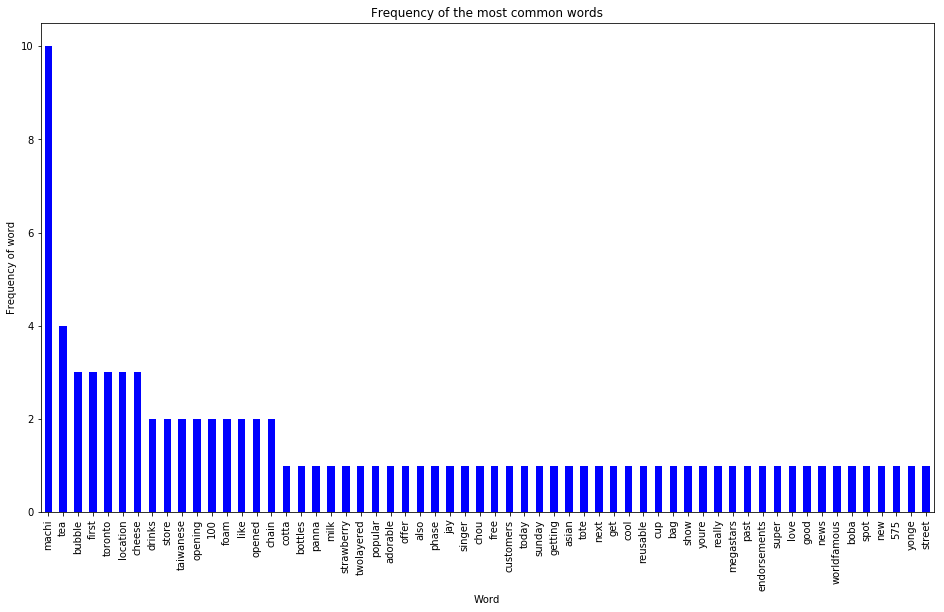

In [35]:
# Plot the frequency of the top 60 words

%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [36]:
#Apply porter stemmer to remaining words
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

#F.Dist of stems
fdist = FreqDist(stems)
counf_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

In [37]:
# Get the frequency distribution of the remaining stems
words = nltk.tokenize.word_tokenize(article2Txt)
fdist = FreqDist (stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

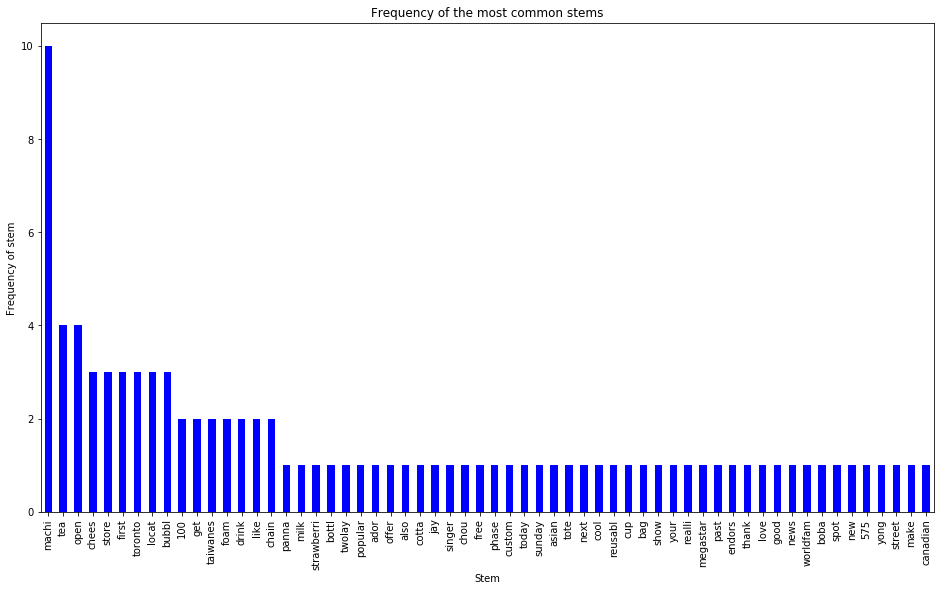

In [39]:

%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common stems')
ax.set_ylabel('Frequency of stem')
ax.set_xlabel('Stem')
plt.show()

# Article 3 Test: Mango Like Dessert
https://www.blogto.com/eat_drink/2019/09/toronto-dessert-cafe-mango/

In [43]:
article3 = open("article3.txt", "r")

#Read doc, print contents
article3Txt = article3.read()
print(article3Txt)

Toronto just got a dessert cafe that puts mango in everything

Calling all mango-lovers: Toronto's newest dessert shop is for you. 

Mango Like Dessert is now open inside Udon Kitanoya in Koreatown. The shop specializes in mango mochi, mango pockets and mango sticky rice. They also do mango sago, mango black grass jelly and mango purple black glutinous rice.

Mango is encased in chewy, pillowy glutinous rice for mochi, and wrapped in a crepe with whipped cream and mango sauce for pockets. Most items are under $10, and if you just can't decide on a mango treat, there's a sharing plate for $9.99.

The shop is founded by pastry chef and single mom Ida Su, who has over 20 years of experience in pastry. 


In [45]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article3Txt= ''.join(c for c in article3Txt if c not in punctuation).lower()

#Print normalized text
print(article3Txt)

toronto just got a dessert cafe that puts mango in everything

calling all mangolovers torontos newest dessert shop is for you 

mango like dessert is now open inside udon kitanoya in koreatown the shop specializes in mango mochi mango pockets and mango sticky rice they also do mango sago mango black grass jelly and mango purple black glutinous rice

mango is encased in chewy pillowy glutinous rice for mochi and wrapped in a crepe with whipped cream and mango sauce for pockets most items are under 10 and if you just cant decide on a mango treat theres a sharing plate for 999

the shop is founded by pastry chef and single mom ida su who has over 20 years of experience in pastry 


In [46]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article3Txt)

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)


             Count
toronto          1
just             2
got              1
a                4
dessert          3
cafe             1
that             1
puts             1
mango           11
in               6
everything       1
calling          1
all              1
mangolovers      1
torontos         1
newest           1
shop             3
is               4
for              4
you              2
like             1
now              1
open             1
inside           1
udon             1
kitanoya         1
koreatown        1
the              2
specializes      1
mochi            2
...            ...
sauce            1
most             1
items            1
are              1
under            1
10               1
if               1
cant             1
decide           1
on               1
treat            1
theres           1
sharing          1
plate            1
999              1
founded          1
by               1
pastry           2
chef             1
single           1
mom         

In [51]:
#Remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
article3Txt = ' '.join([word for word in article3Txt.split() if word not in (stopwords.words('english'))])
print(article3Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
toronto got dessert cafe puts mango everything calling mangolovers torontos newest dessert shop mango like dessert open inside udon kitanoya koreatown shop specializes mango mochi mango pockets mango sticky rice also mango sago mango black grass jelly mango purple black glutinous rice mango encased chewy pillowy glutinous rice mochi wrapped crepe whipped cream mango sauce pockets items 10 cant decide mango treat theres sharing plate 999 shop founded pastry chef single mom ida su 20 years experience pastry


In [52]:
# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(article3Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


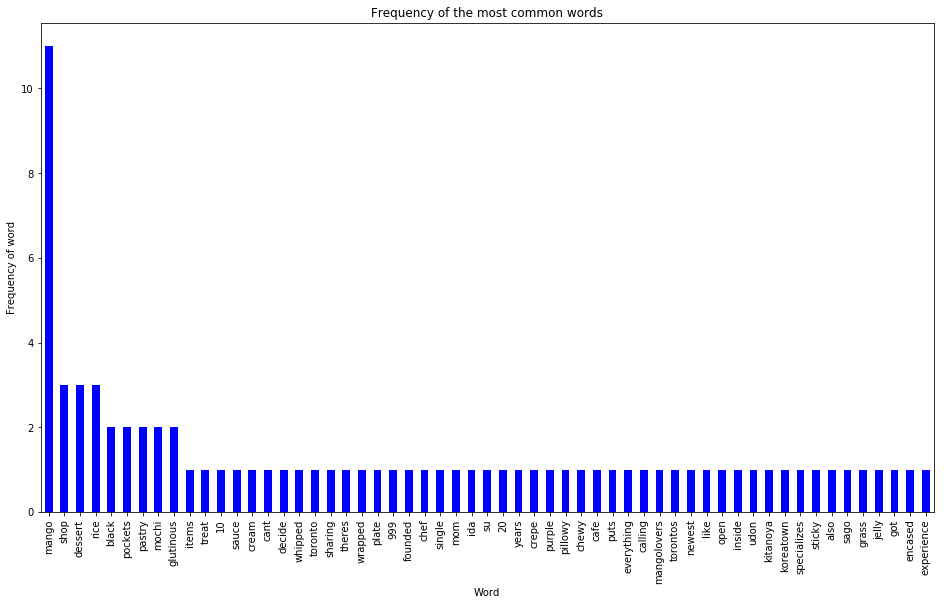

In [53]:
# Plot the frequency of the top 60 words
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [54]:
#Apply porter stemmer to remaining words
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

#F.Dist of stems
fdist = FreqDist(stems)
counf_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

In [56]:
# Get the frequency distribution of the stems
words = nltk.tokenize.word_tokenize(article3Txt)
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


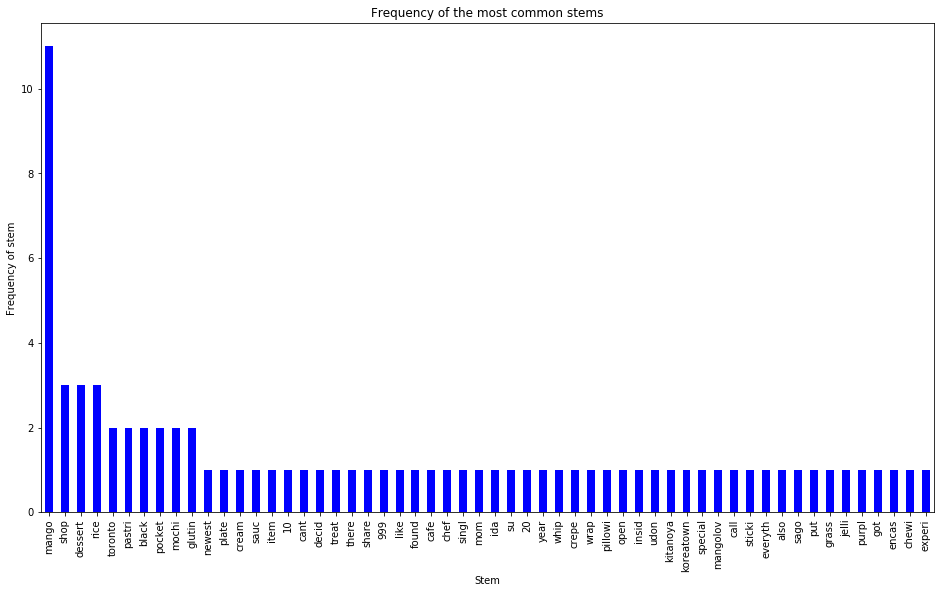

In [57]:
# Plot the frequency of the top 60 stems
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common stems')
ax.set_ylabel('Frequency of stem')
ax.set_xlabel('Stem')
plt.show()

# Inverse Doc Frequency Comparison
- We have three samples loaded, now using textblob to find the top 5 most important words in each document

In [58]:
# install textblob library and define functions for TF-IDF
!pip install -U textblob
import math
from textblob import TextBlob as tb

Requirement already up-to-date: textblob in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.15.3)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [75]:
def tf(word, doc):
    lenOfDoc = len(doc.words)
    if lenOfDoc < 1: return 0
    else: return doc.words.count(word) / lenOfDoc
    
def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    docsCount = contains(word, docs)
    if docsCount < 1 : return 0
    else: return math.log(len(docs) / docsCount)
    
def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)

# Create a collection of documents as textblobs
doc1 = tb(article1Txt)
doc2 = tb(article2Txt)
doc3 = tb(article3Txt)
docs = [doc1, doc2, doc3]

In [77]:
# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


-----------------------------------------------------------
Top words in document 1
	Word: gusto, TF-IDF: 0.03841
	Word: italian, TF-IDF: 0.02305
	Word: 501, TF-IDF: 0.02305
	Word: 101, TF-IDF: 0.01537
	Word: food, TF-IDF: 0.01537
Top words in document 2
	Word: machi, TF-IDF: 0.09809
	Word: tea, TF-IDF: 0.03924
	Word: cheese, TF-IDF: 0.02943
	Word: first, TF-IDF: 0.02943
	Word: bubble, TF-IDF: 0.02943
Top words in document 3
	Word: mango, TF-IDF: 0.15493
	Word: dessert, TF-IDF: 0.04225
	Word: rice, TF-IDF: 0.04225
	Word: mochi, TF-IDF: 0.02817
	Word: pockets, TF-IDF: 0.02817


# Conclusions

Complication: Cannot reliably pull topics/location & business name into a CSV output file. Will have to find a more structured data source.


In [ ]:
print(article2Txt)